<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [85]:
# load the csv file
df1=pd.read_csv('Life_Expectancy.csv', index_col=0)
# type your code here

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
df1.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Status              124 non-null    object 
 1   Adult_Mortality     124 non-null    int64  
 2   Infant_Deaths       124 non-null    int64  
 3   Hepatitis           124 non-null    int64  
 4   Measles             124 non-null    int64  
 5    BMI                124 non-null    float64
 6   Underfive_Deaths    124 non-null    int64  
 7   Polio               124 non-null    int64  
 8   Diphtheria          124 non-null    int64  
 9    HIV                124 non-null    float64
 10  GDP                 124 non-null    float64
 11  Population          124 non-null    int64  
 12  Malnourished10_19   124 non-null    float64
 13  Malnourished5_9     124 non-null    float64
 14  Income_Index        124 non-null    float64
 15  Schooling           124 non-null    float64
 16

In [12]:
df1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [13]:
df1.dtypes

Status                 object
Adult_Mortality         int64
Infant_Deaths           int64
Hepatitis               int64
Measles                 int64
 BMI                  float64
Underfive_Deaths        int64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df1['Adult_Mortality'], df1['Expected'])


In [16]:
import statsmodels.api as sm
#Fit the data in the model
SLR_model=sm.OLS(x_train, y_train).fit()
print(SLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Adult_Mortality   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              162.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    5.32e-22
Time:                        15:22:15   Log-Likelihood:                         -574.16
No. Observations:                  93   AIC:                                      1150.
Df Residuals:                      92   BIC:                                      1153.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
df1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
x=df1['Income_Index']
x=sm.add_constant(x)
y=df1['Expected']
SLR_model=sm.OLS(y,x).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.13e-34
Time:                        15:33:36   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [20]:
x.shape

(124, 2)

In [23]:
y.shape

(124,)

In [25]:
#Prediction
pred=SLR_model.predict(x)
residuals=y-pred
sum_resid=np.sum(residuals)
print('sum is =', sum_resid)

sum is = -2.7000623958883807e-13


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
df1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [27]:
x=df1.iloc[:, [3,7,8]]
#add constant
x=sm.add_constant(x)
y=df1['Expected']
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           0.000468
Time:                        16:19:38   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
df1.dtypes

Status                 object
Adult_Mortality         int64
Infant_Deaths           int64
Hepatitis               int64
Measles                 int64
 BMI                  float64
Underfive_Deaths        int64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

In [30]:
df1.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [59]:
x = df1.iloc[:,[3,7,8]]

encoded_status = pd.get_dummies(data = df1['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
x= pd.concat([pd.DataFrame(x), encoded_status], axis=1)

#add constant
x=sm.add_constant(x)
y=df1['Expected']
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           2.00e-09
Time:                        16:49:26   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.77

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
df1.dtypes

Status                 object
Adult_Mortality         int64
Infant_Deaths           int64
Hepatitis               int64
Measles                 int64
 BMI                  float64
Underfive_Deaths        int64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

In [117]:
x.columns

Index(['Developing', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling'],
      dtype='object')

In [118]:
# type your code here
x=df1.iloc[:,:-1]
encoded_status=pd.get_dummies(df1['Status'], drop_first=True)
x.drop('Status', axis=1,inplace=True)
x=pd.concat([encoded_status, x], axis=1)
x=sm.add_constant(x)
y=df1[['Expected']]
import statsmodels.api as sm
model=sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.94e-36
Time:                        10:56:58   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here
df1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [61]:
df1['GDP'].mean()

6866.816502340323

In [82]:
x=df1.iloc[:,[10,14]]
x=sm.add_constant(x)
y=df1['Expected']
model=sm.OLS(y,x).fit()
pred=model.predict(x)
print(model.summary())
SSE=np.sum((y-pred)**2)
SSE

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.44e-33
Time:                        17:21:28   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848   

2527.2338798711357

In [79]:
SST = np.sum((y - y.mean())**2)
SST

8819.80548387097

In [87]:
SSR=np.sum((pred-y.mean())**2)
SSR

6292.571603999833

In [89]:
SSE=np.sum((pred-y)**2)
SSE

2527.2338798711357

In [90]:
SST-SSR

2527.233879871137

In [84]:
R_square=SSR/SST
R_square

0.7134592271345712

In [92]:
r_sq=SSR/SST
r_sq

0.713459227134571

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
# type your code here
df1.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [120]:
x=df1[[ 'Income_Index']]

y=df1['Expected']
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest=train_test_split(x,y)

import statsmodels.api  as sm
model=sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              5225.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                   1.28e-102
Time:                        11:05:07   Log-Likelihood:                         -471.89
No. Observations:                 124   AIC:                                      945.8
Df Residuals:                     123   BIC:                                      948.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# type your code here
import statsmodels.api as sm
x=df1.iloc[:, [1,2,6]]
x=sm.add_constant(x)
y=df1[['Expected']]
model=sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.29e-19
Time:                        11:13:54   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.00

In [124]:
import statsmodels.api as sm
x=df1.iloc[:, [1,2,6,11]]
x=sm.add_constant(x)
y=df1[['Expected']]
model=sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           8.93e-19
Time:                        11:14:49   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.01

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
# type your code here
#Constructing the null hypothesis
#H0: The model is not significant.(m1=m2=m3....=0)
#H1: The model is significant.(Atleast one is not equal to 0.)
x=df1.iloc[:,:-1]
encoded_status=pd.get_dummies(df1['Status'], drop_first=True)
x.drop('Status', axis=1,inplace=True)
x=pd.concat([encoded_status,x], axis=1)
x=sm.add_constant(x)
y=df1[['Expected']]
y.head()
import statsmodels.api as sm
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.94e-36
Time:                        15:16:58   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\user\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


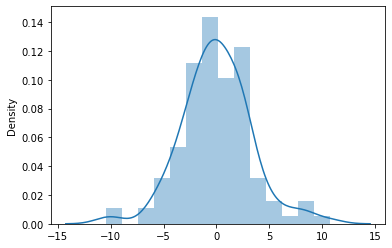

In [151]:
# type your code here
residuals=model.resid
sns.distplot(residuals);

In [153]:
import scipy.stats as stats
test_stats, pvalue=stats.shapiro(residuals)
print('Tests statistics', test_stats)
print('Pvalue:', pvalue)

Tests statistics 0.9769425392150879
Pvalue: 0.03209252282977104


SInce the pvalue is less than 0.05, we reject the null hyp.
Therefore the data is not normal.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [155]:
# load the csv file
# type your code here
df2=pd.read_csv('FEV_data.csv')
df2.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
# type your code here
x=df2.iloc[:, [0,1]]
x=sm.add_constant(x)
y=df2[['FEV']]
import statsmodels.api as sm
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     710.0
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          2.53e-164
Time:                        15:32:29   Log-Likelihood:                -455.76
No. Observations:                 654   AIC:                             917.5
Df Residuals:                     651   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -17.5653      0.538    -32.672      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
# type your code here
df2.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


In [163]:
encoded_smoker=pd.get_dummies(df2['Smoke_habit'], drop_first=True)
x=pd.DataFrame(encoded_smoker)
x=sm.add_constant(x)
y=df2[['FEV']]
import statsmodels.api as sm
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.36e-16
Time:                        15:39:42   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4206      0.098     34.729      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
# type your code here
df2_num=df2.select_dtypes(include=np.number).drop(['FEV'], axis=1)
df2_cat=df2.select_dtypes(include='object')
dummy_var=pd.get_dummies(df2_cat, drop_first=True)
x=pd.concat([df2_num, dummy_var], axis=1)
y=df2[['FEV']]
import statsmodels.api as sm
model=sm.OLS(y,sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          2.78e-168
Time:                        15:49:11   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [170]:
# type your code here
residuals=model.resid
residuals

#Durbin watson test
from statsmodels.stats.stattools import durbin_watson 
print(durbin_watson(model.resid))
#It is positively autocorrelated.

1.6472983005218602


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
# type your code here
residuals=model.resid
stats.shapiro(residuals)
#Residuals obtained form the model are not normally distributed.

ShapiroResult(statistic=0.9544001817703247, pvalue=2.3786520171077685e-13)

C:\Users\user\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


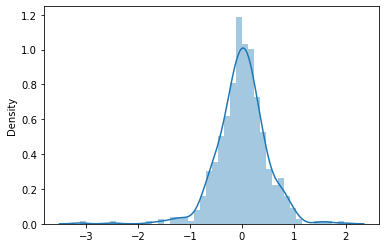

In [178]:
sns.distplot(residuals);

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [221]:
# type your code here
num_var=df2.select_dtypes(include=np.number).drop(['FEV'], axis=1)
cat_var=df2.select_dtypes(include='object')
dummy_var=pd.get_dummies(cat_var, drop_first=True)
x=pd.concat([num_var, dummy_var], axis=1)
x=sm.add_constant(x)
y=df2['FEV']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=1, test_size=0.3)
import statsmodels.api as sm
model=sm.OLS(ytrain, xtrain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     295.0
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          1.62e-124
Time:                        21:25:52   Log-Likelihood:                -299.78
No. Observations:                 457   AIC:                             609.6
Df Residuals:                     452   BIC:                             630.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.7298      0

In [222]:
from sklearn.metrics import mean_squared_error
print('meam squared error', mean_squared_error(ytest,pred))
print('root mean squared error', np.sqrt(mean_squared_error(ytest,pred)))

meam squared error 0.24425989206493764
root mean squared error 0.49422655944914334


In [220]:
predicted = model.predict(xtest)
print("Test RMSE")
print(np.sqrt(np.mean((ytest - predicted)**2)))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print()
print(lr.coef_)
print(lr.intercept_)
print()
print("Training R2")
print(lr.score(xtrain,ytrain))
print("Testing R2")
print(lr.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,predicted)))

Test RMSE
0.49422655944914323

[ 0.         -0.00394607  0.12084319  0.20905531 -0.18493752]
-16.729777210450198

Training R2
0.7230176790386522
Testing R2
0.6350201659837609
0.49422655944914334


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [225]:
# type your code here
df2

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895
...,...,...,...,...,...
649,16,167.0,M,non-smoker,4.270
650,15,168.0,M,non-smoker,3.727
651,18,170.0,F,smoker,2.853
652,16,163.0,F,non-smoker,2.795


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [226]:
# type your code here
df2['Sex'] = pd.get_dummies(df1['Sex'],drop_first = True,prefix = 'Female')
df2['Smoke_habit'] = pd.get_dummies(df1['Smoke_habit'],drop_first = True,prefix = 'Smoke')

KeyError: 'Sex'